In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Punto 3
Como científico de datos en Coink debe ser capaz de realizar modelos de aprendizaje supervisado y no supervisado. En este punto tendrá una base con datos públicos (info_satisfaccion_trabajo.xlsx) con la cual deberá desarrollar un script con 2 modelos de aprendizaje supervisado para predecir la variable JobSatisfaction. Se espera que su procedimiento sea claro y que evalúe el desempeño de su modelo. En menos 150 palabras explique cómo monitorearía este modelo en caso en caso de que estuviera desplegado para uso recurrente de la empresa.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import test_coink.utils.paths as path
from test_coink.utils.coink_utils import assignment_label
pd.options.display.float_format = '{:,.2f}'.format

In [103]:
job_satisfation = pd.read_excel(path.data_raw_dir('info_satisfaccion_trabajo.xlsx'))
job_satisfation.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
875,44,No,Travel_Rarely,200,Research & Development,29,4,Other,1,1225,...,2,80,0,20,3,3,20,11,13,17
1421,47,No,Non-Travel,1162,Research & Development,1,1,Medical,1,2000,...,1,80,2,14,3,1,13,8,5,12
1305,54,No,Travel_Rarely,431,Research & Development,7,4,Medical,1,1830,...,2,80,1,14,2,2,7,1,1,7
63,59,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,81,...,4,80,0,28,3,2,21,16,7,9
864,41,Yes,Non-Travel,906,Research & Development,5,2,Life Sciences,1,1210,...,1,80,1,5,2,1,1,0,0,0


In [104]:
# Tamaño del dataset
print("Tamaño del dataset: ", job_satisfation.shape)

Tamaño del dataset:  (1470, 35)


In [105]:
print(f"Cantidad de filas duplicadas:{job_satisfation.duplicated().sum()}")

Cantidad de filas duplicadas:0


In [106]:
# Tipos de datos de cada columna
print("\nTipos de datos de cada columna: \n", job_satisfation.dtypes)


Tipos de datos de cada columna: 
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [107]:
job_satisfation = assignment_label(job_satisfation)
print("\nTipos de datos de cada columna: \n", job_satisfation.dtypes)

Education
EnvironmentSatisfaction
JobInvolvement
JobSatisfaction
PerformanceRating
RelationshipSatisfaction
WorkLifeBalance

Tipos de datos de cada columna: 
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
P

In [108]:
# Descripción estadística de las columnas numéricas
job_satisfation.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,1.00,"1,024.87",65.89,2.06,"6,502.93","14,313.10",2.69,15.21,80.00,0.79,11.28,2.80,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,0.00,602.02,20.33,1.11,"4,707.96","7,117.79",2.50,3.66,0.00,0.85,7.78,1.29,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,30.00,1.00,"1,009.00","2,094.00",0.00,11.00,80.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,1.00,491.25,48.00,1.00,"2,911.00","8,047.00",1.00,12.00,80.00,0.00,6.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,1.00,"1,020.50",66.00,2.00,"4,919.00","14,235.50",2.00,14.00,80.00,1.00,10.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,1.00,"1,555.75",83.75,3.00,"8,379.00","20,461.50",4.00,18.00,80.00,1.00,15.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,1.00,"2,068.00",100.00,5.00,"19,999.00","26,999.00",9.00,25.00,80.00,3.00,40.00,6.00,40.00,18.00,15.00,17.00


In [109]:
# Se eliminan por que no aportan nada
job_satisfation.drop(columns=['EmployeeCount','StandardHours'], inplace=True)


In [110]:
# Verificación de valores nulos
print("\nValores nulos por columna: \n", job_satisfation.isnull().sum())


Valores nulos por columna: 
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

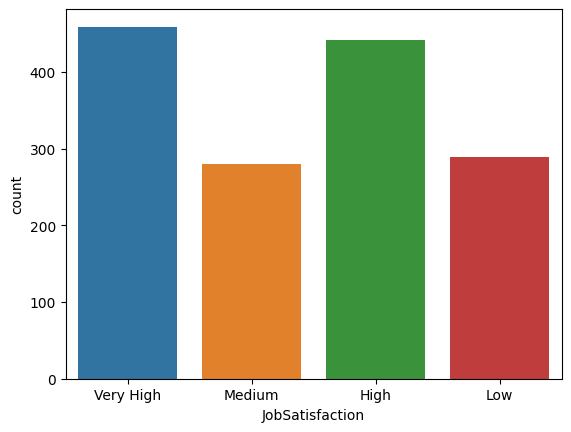

In [111]:
# Gráfico de barras para JobSatisfaction
sns.countplot(x='JobSatisfaction', data=job_satisfation)
plt.show()

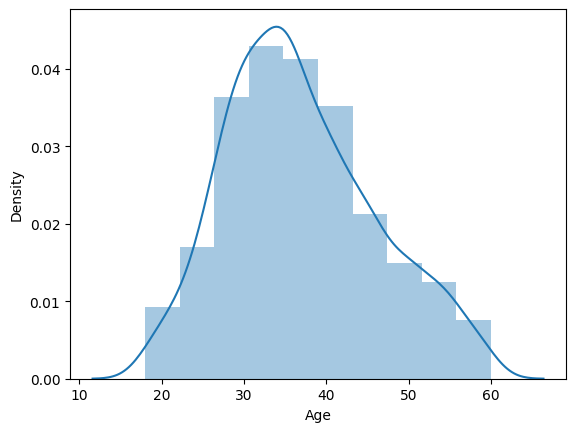

In [112]:
# Histograma para la edad
sns.distplot(job_satisfation['Age'], bins=10)
plt.show()

In [113]:
# Distribución de las variables categóricas
print("\nDistribución de la variable 'Attrition': \n", job_satisfation['JobSatisfaction'].value_counts())
print("\nDistribución de la variable 'Gender': \n", job_satisfation['Gender'].value_counts())


Distribución de la variable 'Attrition': 
 Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64

Distribución de la variable 'Gender': 
 Male      882
Female    588
Name: Gender, dtype: int64


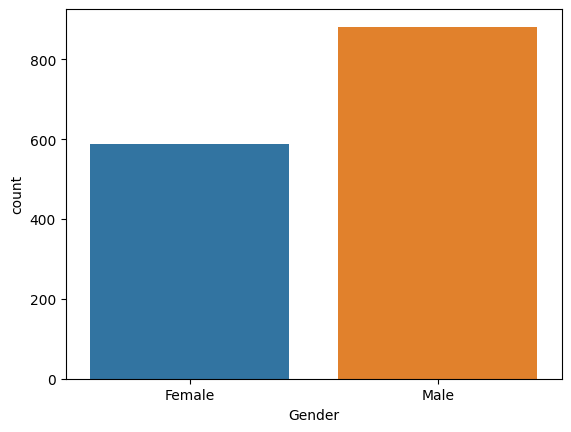

In [114]:
# Gráfico de barras para las variables categóricas
sns.countplot(x='Gender', data=job_satisfation)
plt.show()

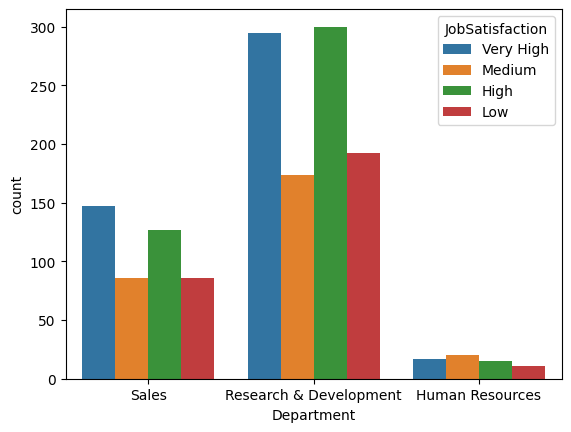

In [115]:
# Gráfico de barras apiladas para dos o más variables categóricas
sns.countplot(x='Department', hue='JobSatisfaction', data=job_satisfation)
plt.show()

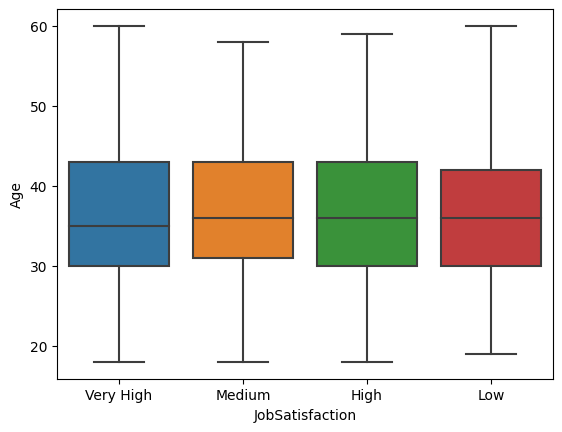

In [116]:
# Boxplot para la relación entre JobSatisfaction y edad
sns.boxplot(x='JobSatisfaction', y='Age', data=job_satisfation)
plt.show()

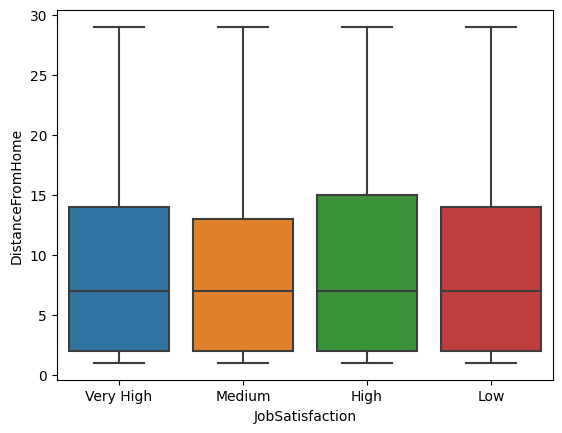

In [117]:
# Boxplot para la relación entre JobSatisfaction y HourlyRate
sns.boxplot(y='DistanceFromHome', x='JobSatisfaction', data=job_satisfation)
plt.show()


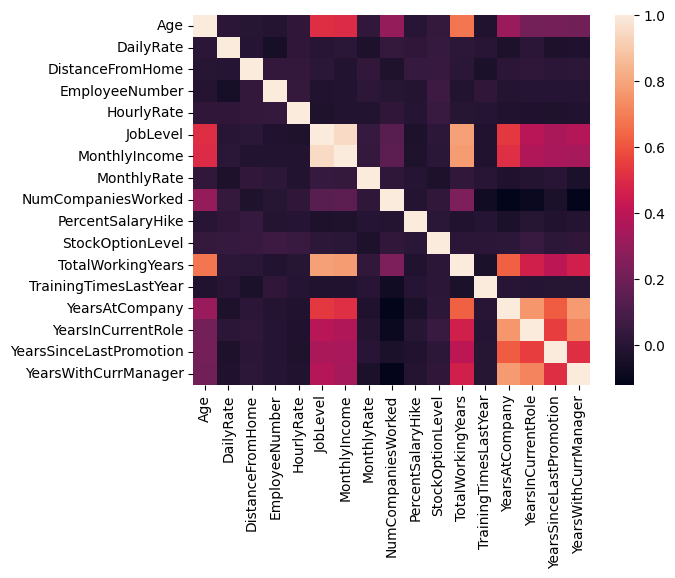

In [118]:
# Matriz de correlación
corr = job_satisfation.corr()
sns.heatmap(corr)
plt.show()

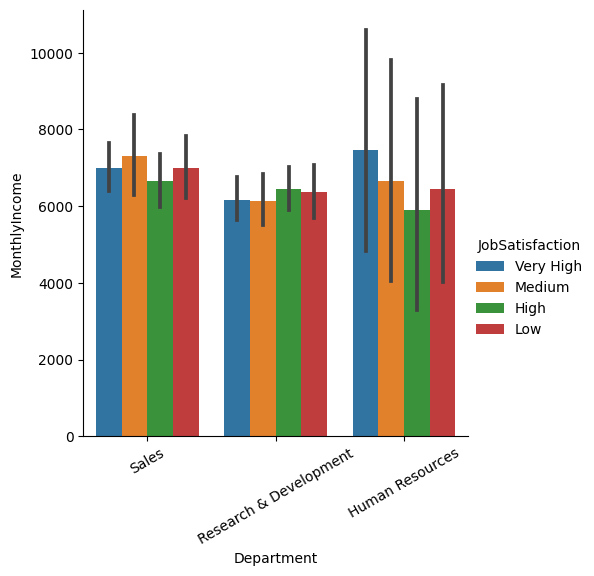

In [119]:
# Gráfico de barras agrupadas por variable de salida
sns.catplot(x='Department', y='MonthlyIncome', hue='JobSatisfaction', data=job_satisfation, kind='bar')
plt.xticks(rotation=30)
plt.show()

In [120]:
job_satisfation.JobSatisfaction = pd.Categorical(job_satisfation.JobSatisfaction)
job_satisfation['JobSatisfaction'] = job_satisfation.JobSatisfaction.cat.codes
job_satisfation.JobSatisfaction

0       3
1       2
2       0
3       0
4       2
       ..
1465    3
1466    1
1467    2
1468    2
1469    0
Name: JobSatisfaction, Length: 1470, dtype: int8

In [121]:
job_satisfation

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Very High,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Low,...,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,2061,High,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,2062,Very High,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2064,Medium,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,2065,Very High,...,Excellent,Very High,0,17,3,Good,9,6,0,8


In [122]:
job_satisfation.to_csv(path.data_processed_dir('info_satisfaccion_trabajo_clean.csv'), index=False)
